In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'D:\\scala_hadoop_setup\\spark'

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import gc

import warnings
warnings.filterwarnings('ignore')

#increase visibility to see all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
transactions = pd.read_csv('D:\\Upgrad\\LJMU\\data\\fraud\\train_transaction.csv')
print(transactions.shape)

(590540, 394)


In [2]:
### Fetching list of columns from both transactions and identity data and drop the columns which has 90% of the data 
### is null or 90% of the data is only one value

In [5]:
def check_NA_Cols_by_percentage(data, percentage) :
    all_cols = data.isnull().sum()
    print(percentage*len(data))
    na_cols = all_cols[all_cols.values >= (percentage*len(data))]
    print("count of columns where", percentage*100,"% of data is NA : ",len(na_cols))
    print("list of columns where values are NA : \n ", list(na_cols.index))
    return list(na_cols.index)                                          
    

### Data Cleaning

In [6]:
def check_top_values(data, percentage) :
    big_top_value_cols = [col for col in data.columns if data[col].value_counts(dropna=False, normalize=True).values[0] > percentage]
    return big_top_value_cols

In [7]:
na_cols = check_NA_Cols_by_percentage(transactions, 0.7)    
print(na_cols)

413378.0
count of columns where 70.0 % of data is NA :  168
list of columns where values are NA : 
  ['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V2

In [8]:
top_value_cols = check_top_values(transactions, 0.9)    
print(top_value_cols)

['isFraud', 'dist2', 'C3', 'D7', 'V98', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V281', 'V284', 'V286', 'V290', 'V293', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V305', 'V309', 'V311', 'V316', 'V318', 'V319', 'V320', 'V321']


In [9]:
transaction_drop_cols = list(set(na_cols + top_value_cols))

In [10]:
transaction_drop_cols.remove('isFraud')

In [11]:
identity = pd.read_csv('D:\\Upgrad\\LJMU\\data\\fraud\\train_identity.csv')

In [12]:
identity_na_cols = check_NA_Cols_by_percentage(identity, 0.7)    

100963.09999999999
count of columns where 70.0 % of data is NA :  9
list of columns where values are NA : 
  ['id_07', 'id_08', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [13]:
identity_top_value_cols = check_top_values(identity, 0.9)    
print(identity_top_value_cols)

['id_07', 'id_08', 'id_11', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_36']


In [14]:
identity_drop_cols = list(set(identity_na_cols + identity_top_value_cols))

In [15]:
drop_cols = transaction_drop_cols + identity_drop_cols

In [16]:
drop_cols

['V139',
 'V178',
 'V166',
 'D7',
 'V254',
 'V136',
 'V144',
 'V318',
 'V175',
 'C3',
 'V248',
 'V122',
 'V297',
 'V323',
 'V329',
 'V137',
 'V204',
 'V261',
 'V187',
 'V230',
 'V161',
 'V197',
 'V232',
 'V206',
 'V147',
 'V321',
 'V153',
 'V281',
 'V171',
 'V231',
 'V162',
 'V216',
 'V233',
 'V109',
 'V267',
 'V143',
 'V148',
 'V183',
 'V190',
 'V201',
 'V239',
 'V219',
 'V258',
 'V110',
 'V113',
 'V225',
 'V264',
 'V236',
 'V213',
 'V237',
 'V211',
 'V121',
 'V316',
 'V173',
 'V176',
 'V150',
 'V277',
 'V263',
 'V247',
 'V112',
 'D14',
 'V241',
 'V102',
 'V195',
 'V286',
 'V129',
 'V192',
 'V311',
 'V338',
 'V245',
 'V209',
 'V299',
 'V151',
 'V198',
 'V202',
 'V228',
 'V240',
 'V325',
 'V108',
 'V132',
 'D6',
 'V180',
 'V238',
 'V218',
 'V207',
 'V223',
 'V275',
 'V116',
 'V319',
 'V224',
 'V104',
 'V196',
 'V253',
 'V157',
 'V243',
 'V199',
 'V234',
 'V300',
 'V114',
 'V107',
 'V324',
 'V262',
 'V214',
 'V305',
 'V274',
 'V170',
 'V330',
 'V193',
 'V167',
 'V337',
 'V106',
 'V118',

In [17]:
del transactions, identity 

In [3]:
### Creating the Spark context and loading transactions and idendity data.

### Data Loading

In [18]:
spark = SparkSession.builder.appName('FraudDetection')\
    .master('local[2]')\
    .config('spark.driver.memory', '4g')\
    .config('spark.executor.memory', '8g')\
    .config('spark.serializer', 'org.apache.spark.serializer.KryoSerializer')\
    .getOrCreate()

In [19]:
df = spark.read.options(header='True', inferSchema='True').csv("D:\\Upgrad\\LJMU\\data\\fraud\\train_transaction.csv")

In [20]:
df.printSchema()

root
 |-- TransactionID: integer (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- TransactionDT: integer (nullable = true)
 |-- TransactionAmt: double (nullable = true)
 |-- ProductCD: string (nullable = true)
 |-- card1: integer (nullable = true)
 |-- card2: double (nullable = true)
 |-- card3: double (nullable = true)
 |-- card4: string (nullable = true)
 |-- card5: double (nullable = true)
 |-- card6: string (nullable = true)
 |-- addr1: double (nullable = true)
 |-- addr2: double (nullable = true)
 |-- dist1: double (nullable = true)
 |-- dist2: double (nullable = true)
 |-- P_emaildomain: string (nullable = true)
 |-- R_emaildomain: string (nullable = true)
 |-- C1: double (nullable = true)
 |-- C2: double (nullable = true)
 |-- C3: double (nullable = true)
 |-- C4: double (nullable = true)
 |-- C5: double (nullable = true)
 |-- C6: double (nullable = true)
 |-- C7: double (nullable = true)
 |-- C8: double (nullable = true)
 |-- C9: double (nullable = true)
 |-- C10:

In [21]:
identity = spark.read.options(header='True', inferSchema='True').csv("D:\\Upgrad\\LJMU\\data\\fraud\\train_identity.csv")

In [22]:
identity.printSchema()

root
 |-- TransactionID: integer (nullable = true)
 |-- id_01: double (nullable = true)
 |-- id_02: double (nullable = true)
 |-- id_03: double (nullable = true)
 |-- id_04: double (nullable = true)
 |-- id_05: double (nullable = true)
 |-- id_06: double (nullable = true)
 |-- id_07: double (nullable = true)
 |-- id_08: double (nullable = true)
 |-- id_09: double (nullable = true)
 |-- id_10: double (nullable = true)
 |-- id_11: double (nullable = true)
 |-- id_12: string (nullable = true)
 |-- id_13: double (nullable = true)
 |-- id_14: double (nullable = true)
 |-- id_15: string (nullable = true)
 |-- id_16: string (nullable = true)
 |-- id_17: double (nullable = true)
 |-- id_18: double (nullable = true)
 |-- id_19: double (nullable = true)
 |-- id_20: double (nullable = true)
 |-- id_21: double (nullable = true)
 |-- id_22: double (nullable = true)
 |-- id_23: string (nullable = true)
 |-- id_24: double (nullable = true)
 |-- id_25: double (nullable = true)
 |-- id_26: double (null

In [23]:
df = df.drop(*transaction_drop_cols)

In [24]:
identity = identity.drop(*identity_drop_cols)

In [25]:
joinDF = df.join(identity, on=['TransactionID'], how='left')

In [7]:
joinDF.show()

+-------------+-------+-------------+--------------+---------+-----+-----+-----+----------+-----+------+-----+-----+-----+-----+-------------+-------------+----+----+---+---+---+----+---+---+----+---+----+---+----+----+-----+-----+----+-----+----+----+----+-----------------+------------------+-----+-----+----+----+----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---

In [26]:
cat_cols = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','DeviceInfo','id_12','id_13','id_14','id_15','id_16','id_17','id_18','id_19','id_20','id_28','id_29','id_30','id_31','id_32','id_33','id_34','id_35','id_37','id_38']

In [27]:
cat_cols_with_join_col = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','DeviceInfo','id_12','id_13','id_14','id_15','id_16','id_17','id_18','id_19','id_20','id_28','id_29','id_30','id_31','id_32','id_33','id_34','id_35','id_37','id_38','TransactionID']

In [28]:
catDF = joinDF.select(*cat_cols_with_join_col)

In [29]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

### Feature Transformation

In [30]:
for item in cat_cols:
    indexer = StringIndexer(inputCol=item, outputCol=item + 'Index')    
    indexer.setHandleInvalid("keep")
    catDF = indexer.fit(catDF).transform(catDF).drop(item)
    onehotenc = OneHotEncoder(inputCol=item + 'Index', outputCol=item, dropLast=False)
    catDF = onehotenc.transform(catDF).drop(item +'Index')
    print (item + ' converted')

ProductCD converted
card1 converted
card2 converted
card3 converted
card4 converted
card5 converted
card6 converted
addr1 converted
addr2 converted
P_emaildomain converted
M1 converted
M2 converted
M3 converted
M4 converted
M5 converted
M6 converted
M7 converted
M8 converted
M9 converted
DeviceType converted
DeviceInfo converted
id_12 converted
id_13 converted
id_14 converted
id_15 converted
id_16 converted
id_17 converted
id_18 converted
id_19 converted
id_20 converted
id_28 converted
id_29 converted
id_30 converted
id_31 converted
id_32 converted
id_33 converted
id_34 converted
id_35 converted
id_37 converted
id_38 converted


In [31]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, TrainValidationSplit
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler

In [32]:
joinDF = joinDF.drop(*cat_cols)

In [33]:
joinDF = joinDF.join(catDF, on=['TransactionID'], how='inner')

In [27]:
joinDF.show(1,False)

+-------------+-------+-------------+--------------+-----+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+-----+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-

In [16]:
drop_cols = ['D14','V330','V326','V336','V309','V151','D13','V134','V114','V322','V102','V108','V166','V297','V158','V118','V121','V311','D7','D6','V111','V305','V298','V324','V325','V331','V154','C3','V163','V140','V155','V159','V149','V132','V153','V147','V329','V284','V117','V339','V150','V107','V113','V162','V112','V101','V165','V290','V124','V338','V144','V157','V143','V122','V145','V115','V328','D8','V98','V103','V299','V295','V146','V109','V321','V164','V320','V334','V138','V141','V337','V137','V316','V296','V139','V327','V286','V335','V119','D12','V105','V125','V156','V110','V129','V333','V142','V116','V104','V136','V135','V152','V318','D9','V133','V300','V281','V160','V120','V293','V301','dist2','V123','V323','V319','V148','V161','V332','V106'
'id_07','id_08','id_11','id_21','id_22','id_23','id_24','id_25','id_26','id_27','id_36']

In [17]:
#joinDF = joinDF.drop(*drop_cols)

In [34]:
cols = joinDF.schema.names

In [43]:
print(cols)

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'dist1', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131', 'V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V29

In [35]:
cols.remove('isFraud')

In [36]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, TrainValidationSplit
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler

#### Below code is used for Undersampling in Spark.

In [37]:
joinDF = joinDF.fillna(0)

In [38]:
joinDF = joinDF.withColumnRenamed('isFraud','label')

In [39]:
joinDFClass0 = joinDF.filter("label=0")

In [40]:
joinDFClass1 = joinDF.filter("label=1")

In [41]:
sampleRatio = joinDFClass1.count() / joinDF.count()

In [42]:
print(sampleRatio)

0.03499000914417313


In [43]:
joinDFClass0 = joinDFClass0.sample(False, sampleRatio)

In [44]:
joinDFUnder = joinDFClass1.unionAll(joinDFClass0)

In [45]:
finalCount = joinDFUnder.count()

In [46]:
print(finalCount)

40463


In [ ]:
### Feature Transformation with the actual data loading 

In [47]:
va = VectorAssembler(outputCol='features',inputCols=cols)
data = va.transform(joinDF).select('features','label')

In [49]:
data.show(1, False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [48]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)


scalerModel = scaler.fit(data)


scaledData = scalerModel.transform(data).select("scaledFeatures",'label')

In [51]:
scaledData.printSchema()

root
 |-- scaledFeatures: vector (nullable = true)
 |-- label: integer (nullable = true)



In [52]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [53]:
train, test = scaledData.randomSplit([0.7, 0.3], seed=12345)

In [55]:
train.show(2)

+--------------------+-----+
|      scaledFeatures|label|
+--------------------+-----+
|[-1.7315008714915...|    0|
|[-1.7308673451298...|    0|
+--------------------+-----+
only showing top 2 rows



In [56]:
train.printSchema()

root
 |-- scaledFeatures: vector (nullable = true)
 |-- label: integer (nullable = true)



### Model Building

### Random Forest

In [ ]:
### Started with a basic random forest model and then used few hyper parameters which has given litter more accuracy

In [57]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'scaledFeatures', labelCol = 'label')

In [63]:
rfModel = rf.fit(train)

In [64]:
predictions = rfModel.transform(test)

In [65]:
predictions.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|      scaledFeatures|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-1.7234644722730...|    0|[19.6337657343343...|[0.98168828671671...|       0.0|
|[-1.7231125131831...|    0|[19.6422682668531...|[0.98211341334265...|       0.0|
|[-1.7197806337990...|    0|[19.2850785366273...|[0.96425392683136...|       0.0|
|[-1.7180912301677...|    0|[19.2787518242021...|[0.96393759121010...|       0.0|
|[-1.7109523266283...|    0|[19.5227481832477...|[0.97613740916238...|       0.0|
|[-1.7104361199631...|    0|[19.1487086339499...|[0.95743543169749...|       0.0|
|[-1.7086117986807...|    0|[19.5945606101073...|[0.97972803050536...|       0.0|
|[-1.7053913730084...|    0|[19.5299471423674...|[0.97649735711837...|       0.0|
|[-1.7030273811215...|    0|[19.6520064169517...|[0.98260032084758...|       0.0|
|[-1.69228676289

#### Random Forest metrics

In [66]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8064103638730353


In [68]:
print(rf.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n]. (default: auto)
featuresCol: features column name. (default: features, current: scaledFeatures)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (default: gini)
labelCol: label column name. (default: label, current: label)
maxBins: Max number of bins for discretizing continuous features. 

#### Random Forest with hyperparameters tuning.

In [58]:
rf_opt = RandomForestClassifier(featuresCol = 'scaledFeatures', labelCol = 'label', numTrees=100, maxBins=50, maxDepth=10)

In [59]:
rf_opt_model = rf_opt.fit(train)

In [60]:
predictions = rf_opt_model.transform(test)

In [61]:
predictions.select('scaledFeatures', 'label', 'prediction', 'probability').show(10)

+--------------------+-----+----------+--------------------+
|      scaledFeatures|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|[-1.7234644722730...|    0|       0.0|[0.98894167653160...|
|[-1.7231125131831...|    0|       0.0|[0.98981193681684...|
|[-1.7197806337990...|    0|       0.0|[0.97090600274378...|
|[-1.7180912301677...|    0|       0.0|[0.97153196861363...|
|[-1.7109523266283...|    0|       0.0|[0.97888620299434...|
|[-1.7104361199631...|    0|       0.0|[0.95764992091781...|
|[-1.7086117986807...|    0|       0.0|[0.97922504305255...|
|[-1.7053913730084...|    0|       0.0|[0.97811688650452...|
|[-1.7030273811215...|    0|       0.0|[0.99013232076726...|
|[-1.6922867628958...|    0|       0.0|[0.93671897456028...|
+--------------------+-----+----------+--------------------+
only showing top 10 rows



#### Random Forest metrics with hyperparameter tuning.

In [62]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8512213189657774


In [57]:
rf = RandomForestClassifier(labelCol="label", featuresCol="scaledFeatures", numTrees=10)
pipeline = Pipeline(stages=[rf])
paramGrid = ParamGridBuilder().addGrid(rf.numTrees, [10, 30]).build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=2) 



In [58]:
cvModel = crossval.fit(train)

In [91]:
predictions = cvModel.transform(test).select("scaledFeatures", "label", "prediction")

In [76]:
cvModel.params

[Param(parent='CrossValidatorModel_4cd588c1a37cfdbf5c90', name='estimator', doc='estimator to be cross-validated'),
 Param(parent='CrossValidatorModel_4cd588c1a37cfdbf5c90', name='estimatorParamMaps', doc='estimator param maps'),
 Param(parent='CrossValidatorModel_4cd588c1a37cfdbf5c90', name='evaluator', doc='evaluator used to select hyper-parameters that maximize the validator metric'),
 Param(parent='CrossValidatorModel_4cd588c1a37cfdbf5c90', name='seed', doc='random seed.')]

In [77]:
cvModel.avgMetrics

[0.8073452942382466, 0.9619601324523113]

In [79]:
bestModel = cvModel.bestModel

In [84]:
rf = bestModel.stages[0]

In [87]:
print(rf)

RandomForestClassificationModel (uid=RandomForestClassifier_4282b9262e6433d7f678) with 30 trees


In [89]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [93]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.0350115


In [94]:
print(accuracy)

0.9649884552570818


In [63]:
best_model = cvModel.bestModel
best_model.write().overwrite().save('rf_cv_model')

In [95]:
rf1 = RandomForestClassifier(labelCol="label", featuresCol="scaledFeatures", numTrees=30, maxDepth=10)
rf_model = rf1.fit(train)

In [98]:
predictions = rf_model.transform(test)

In [99]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9929791374547424


In [100]:
rf_model.save("random_forest_std")

In [101]:
import sys
from pyspark.ml.classification import RandomForestClassificationModel

rf_model_load = RandomForestClassificationModel.load("random_forest_std")

In [102]:
rf_model_load

RandomForestClassificationModel (uid=RandomForestClassifier_472aa9620ce9c0c7332e) with 30 trees

### Logistic Regression

In [69]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'scaledFeatures', labelCol = 'label', maxIter=10, regParam=0.01)
lrModel = lr.fit(train)

In [75]:
lrModel.save("lr_std_model")

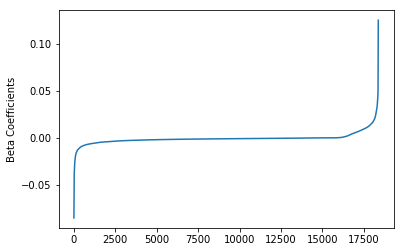

In [70]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

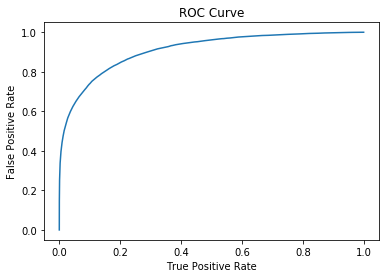

Training set areaUnderROC: 0.9097595042779892


In [71]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

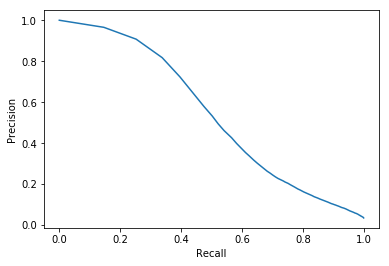

In [72]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [73]:
predictions = lrModel.transform(test)
predictions.select('scaledFeatures', 'label', 'prediction', 'probability').show(10)

+--------------------+-----+----------+--------------------+
|      scaledFeatures|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|[-1.7234644722730...|    0|       0.0|[0.98232551091357...|
|[-1.7231125131831...|    0|       0.0|[0.99434375970928...|
|[-1.7197806337990...|    0|       0.0|[0.99401984433346...|
|[-1.7180912301677...|    0|       0.0|[0.99646626391857...|
|[-1.7109523266283...|    0|       0.0|[0.95825954492579...|
|[-1.7104361199631...|    0|       0.0|[0.86458031527198...|
|[-1.7086117986807...|    0|       0.0|[0.97807293491824...|
|[-1.7053913730084...|    0|       0.0|[0.95473428902394...|
|[-1.7030273811215...|    0|       0.0|[0.99325060530146...|
|[-1.6922867628958...|    0|       0.0|[0.94736514748276...|
+--------------------+-----+----------+--------------------+
only showing top 10 rows



### GBTClassifier Model

In [77]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'scaledFeatures', labelCol = 'label', maxIter=10)
gbtModel = gbt.fit(train)

In [78]:
predictions = gbtModel.transform(test)

In [79]:
predictions.select('scaledFeatures', 'label', 'prediction', 'probability').show(10)

+--------------------+-----+----------+--------------------+
|      scaledFeatures|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|[-1.7234644722730...|    0|       0.0|[0.92866970951730...|
|[-1.7231125131831...|    0|       0.0|[0.92866970951730...|
|[-1.7197806337990...|    0|       0.0|[0.92715785714152...|
|[-1.7180912301677...|    0|       0.0|[0.92738066341593...|
|[-1.7109523266283...|    0|       0.0|[0.92670864374328...|
|[-1.7104361199631...|    0|       0.0|[0.92738066341593...|
|[-1.7086117986807...|    0|       0.0|[0.92670864374328...|
|[-1.7053913730084...|    0|       0.0|[0.92670864374328...|
|[-1.7030273811215...|    0|       0.0|[0.92866970951730...|
|[-1.6922867628958...|    0|       0.0|[0.92467465718076...|
+--------------------+-----+----------+--------------------+
only showing top 10 rows



In [69]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: for Opt GBT " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: for Opt GBT 0.8834493493682316


In [65]:
from pyspark.ml.classification import GBTClassifier
gbt_opt = GBTClassifier(featuresCol = 'scaledFeatures', labelCol = 'label',maxDepth=10, maxBins=40, maxIter=10)
gbt_opt_model = gbt_opt.fit(train)

In [66]:
predictions = gbt_opt_model.transform(test)

In [67]:
predictions.select('scaledFeatures', 'label', 'prediction', 'probability').show(10)

+--------------------+-----+----------+--------------------+
|      scaledFeatures|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|[-1.7234644722730...|    0|       0.0|[0.93098216961016...|
|[-1.7231125131831...|    0|       0.0|[0.93098216961016...|
|[-1.7197806337990...|    0|       0.0|[0.92985337050277...|
|[-1.7180912301677...|    0|       0.0|[0.93064002966407...|
|[-1.7109523266283...|    0|       0.0|[0.92809395856727...|
|[-1.7104361199631...|    0|       0.0|[0.93064002966407...|
|[-1.7086117986807...|    0|       0.0|[0.92785059005645...|
|[-1.7053913730084...|    0|       0.0|[0.92809395856727...|
|[-1.7030273811215...|    0|       0.0|[0.93098216961016...|
|[-1.6922867628958...|    0|       0.0|[0.92149699103630...|
+--------------------+-----+----------+--------------------+
only showing top 10 rows



#### GBTClassifier metrics

In [68]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8834493493682318


In [ ]:
#### Tried to build the GBTClassifier cross validation with some hyper paramters job is failing due to limited resources 
#### in local system

In [64]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [5, 10])
             .addGrid(gbt.maxBins, [40, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

Py4JJavaError: An error occurred while calling o1275.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 25 in stage 307.0 failed 1 times, most recent failure: Lost task 25.0 in stage 307.0 (TID 10576, localhost, executor driver): ExecutorLostFailure (executor driver exited caused by one of the running tasks) Reason: Executor heartbeat timed out after 23349846 ms
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1517)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1505)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1504)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1504)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1732)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1687)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1676)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:630)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2029)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2050)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2069)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2094)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:936)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:935)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$collectAsMap$1.apply(PairRDDFunctions.scala:746)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$collectAsMap$1.apply(PairRDDFunctions.scala:745)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.PairRDDFunctions.collectAsMap(PairRDDFunctions.scala:745)
	at org.apache.spark.ml.tree.impl.RandomForest$.findSplitsBySorting(RandomForest.scala:928)
	at org.apache.spark.ml.tree.impl.RandomForest$.findSplits(RandomForest.scala:906)
	at org.apache.spark.ml.tree.impl.RandomForest$.run(RandomForest.scala:118)
	at org.apache.spark.ml.regression.DecisionTreeRegressor.train(DecisionTreeRegressor.scala:125)
	at org.apache.spark.ml.tree.impl.GradientBoostedTrees$.boost(GradientBoostedTrees.scala:323)
	at org.apache.spark.ml.tree.impl.GradientBoostedTrees$.run(GradientBoostedTrees.scala:53)
	at org.apache.spark.ml.classification.GBTClassifier.train(GBTClassifier.scala:175)
	at org.apache.spark.ml.classification.GBTClassifier.train(GBTClassifier.scala:59)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:118)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:82)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)


#### Testing

In [30]:
test_df = spark.read.options(header='True', inferSchema='True').csv("D:\\Upgrad\\LJMU\\data\\fraud\\test_transaction.csv")

In [81]:
gbtModel.save("gb_std_model")

In [31]:
test_identity = spark.read.options(header='True', inferSchema='True').csv("D:\\Upgrad\\LJMU\\data\\fraud\\test_identity.csv")

In [32]:
test_joinDF = test_df.join(test_identity, on=['TransactionID'], how='left')

In [34]:
test_joinDF.printSchema()

root
 |-- TransactionID: integer (nullable = true)
 |-- TransactionDT: integer (nullable = true)
 |-- TransactionAmt: double (nullable = true)
 |-- ProductCD: string (nullable = true)
 |-- card1: integer (nullable = true)
 |-- card2: double (nullable = true)
 |-- card3: double (nullable = true)
 |-- card4: string (nullable = true)
 |-- card5: double (nullable = true)
 |-- card6: string (nullable = true)
 |-- addr1: double (nullable = true)
 |-- addr2: double (nullable = true)
 |-- dist1: double (nullable = true)
 |-- dist2: double (nullable = true)
 |-- P_emaildomain: string (nullable = true)
 |-- R_emaildomain: string (nullable = true)
 |-- C1: double (nullable = true)
 |-- C2: double (nullable = true)
 |-- C3: double (nullable = true)
 |-- C4: double (nullable = true)
 |-- C5: double (nullable = true)
 |-- C6: double (nullable = true)
 |-- C7: double (nullable = true)
 |-- C8: double (nullable = true)
 |-- C9: double (nullable = true)
 |-- C10: double (nullable = true)
 |-- C11: doub

In [36]:
test_cat_cols = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','DeviceInfo','id-12','id-13','id-14','id-15','id-16','id-17','id-18','id-19','id-20','id-28','id-29','id-30','id-31','id-32','id-33','id-34','id-35','id-37','id-38']

In [37]:
test_cat_cols_with_join_col = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9','DeviceType','DeviceInfo','id-12','id-13','id-14','id-15','id-16','id-17','id-18','id-19','id-20','id-28','id-29','id-30','id-31','id-32','id-33','id-34','id-35','id-37','id-38','TransactionID']

In [38]:
test_catDF = test_joinDF.select(*test_cat_cols_with_join_col)

In [39]:
for item in test_cat_cols:
    indexer = StringIndexer(inputCol=item, outputCol=item + 'Index')    
    indexer.setHandleInvalid("keep")
    test_catDF = indexer.fit(test_catDF).transform(test_catDF).drop(item)
    onehotenc = OneHotEncoder(inputCol=item + 'Index', outputCol=item, dropLast=False)
    test_catDF = onehotenc.transform(test_catDF).drop(item +'Index')
    print (item + ' converted')

ProductCD converted
card1 converted
card2 converted
card3 converted
card4 converted
card5 converted
card6 converted
addr1 converted
addr2 converted
P_emaildomain converted
R_emaildomain converted
M1 converted
M2 converted
M3 converted
M4 converted
M5 converted
M6 converted
M7 converted
M8 converted
M9 converted
DeviceType converted
DeviceInfo converted
id-12 converted
id-13 converted
id-14 converted
id-15 converted
id-16 converted
id-17 converted
id-18 converted
id-19 converted
id-20 converted
id-28 converted
id-29 converted
id-30 converted
id-31 converted
id-32 converted
id-33 converted
id-34 converted
id-35 converted
id-37 converted
id-38 converted


In [40]:
test_joinDF = test_joinDF.drop(*test_cat_cols)

In [41]:
test_joinDF = test_joinDF.join(test_catDF, on=['TransactionID'], how='inner')

In [42]:
test_drop_cols = ['D14','V330','V326','V336','V309','V151','D13','V134','V114','V322','V102','V108','V166','V297','V158','V118','V121','V311','D7','D6','V111','V305','V298','V324','V325','V331','V154','C3','V163','V140','V155','V159','V149','V132','V153','V147','V329','V284','V117','V339','V150','V107','V113','V162','V112','V101','V165','V290','V124','V338','V144','V157','V143','V122','V145','V115','V328','D8','V98','V103','V299','V295','V146','V109','V321','V164','V320','V334','V138','V141','V337','V137','V316','V296','V139','V327','V286','V335','V119','D12','V105','V125','V156','V110','V129','V333','V142','V116','V104','V136','V135','V152','V318','D9','V133','V300','V281','V160','V120','V293','V301','dist2','V123','V323','V319','V148','V161','V332','V106'
'id_07','id-08','id-11','id-21','id-22','id-23','id-24','id-25','id-26','id-27','id-36']

In [43]:
test_joinDF = test_joinDF.drop(*test_drop_cols)

In [44]:
test_joinDF = test_joinDF.fillna(0)

In [45]:
test_cols = test_joinDF.schema.names

In [48]:
test_va = VectorAssembler(outputCol='features',inputCols=test_cols)

In [49]:
test_data = test_va.transform(test_joinDF).select('features')

In [51]:
predictions = rf_model.transform(test_data)

In [52]:
predictions.describe()

DataFrame[summary: string, prediction: string]

In [53]:
predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [54]:
predictions.select('prediction','probability').show()

+----------+--------------------+
|prediction|         probability|
+----------+--------------------+
|       0.0|[0.97614341709396...|
|       0.0|[0.98098836590218...|
|       0.0|[0.96671548572125...|
|       0.0|[0.98083080545078...|
|       0.0|[0.97165457163283...|
|       0.0|[0.97341816702965...|
|       0.0|[0.97835726845592...|
|       0.0|[0.93455137940762...|
|       0.0|[0.98059389364524...|
|       0.0|[0.95793653743713...|
|       0.0|[0.97936082827275...|
|       0.0|[0.97267964242061...|
|       0.0|[0.97912066239251...|
|       0.0|[0.97267964242061...|
|       0.0|[0.95430596217786...|
|       0.0|[0.94646040241516...|
|       0.0|[0.93483979878085...|
|       0.0|[0.97700687953707...|
|       0.0|[0.98116196174285...|
|       0.0|[0.97964888147587...|
+----------+--------------------+
only showing top 20 rows



### Model building using undersampling in Spark

#### Feature transformation

In [82]:
va = VectorAssembler(outputCol='features',inputCols=cols)
data = va.transform(joinDFUnder).select('features','label')

In [83]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)


scalerModel = scaler.fit(data)


scaledData = scalerModel.transform(data).select("scaledFeatures",'label')

In [84]:
train, test = scaledData.randomSplit([0.7, 0.3], seed=12345)

### Random Forest

In [85]:
rf_under_sample = RandomForestClassifier(featuresCol = 'scaledFeatures', labelCol = 'label')

In [86]:
rfModel_under_sample = rf_under_sample.fit(train)

In [89]:
predictions_under = rfModel_under_sample.transform(test)

In [90]:
predictions_under.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|      scaledFeatures|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-1.6695122865070...|    1|[7.92888740417202...|[0.39644437020860...|       1.0|
|[-1.5980467181264...|    1|[4.39461025542261...|[0.21973051277113...|       1.0|
|[-1.4842849562365...|    1|[11.3191701358960...|[0.56595850679480...|       0.0|
|[-1.4603051143278...|    1|[6.14920760824911...|[0.30746038041245...|       1.0|
|[-1.1675074649620...|    1|[5.00406154794283...|[0.25020307739714...|       1.0|
|[-1.1128643826240...|    1|[6.14434488838222...|[0.30721724441911...|       1.0|
|[-1.0080118189414...|    1|[7.82033671512682...|[0.39101683575634...|       1.0|
|[-0.9128003875949...|    1|[4.20338439390207...|[0.21016921969510...|       1.0|
|[-0.7766846374758...|    1|[10.0072994847222...|[0.50036497423611...|       0.0|
|[-0.50873675172

In [91]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_under, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7987746506466986


### Logistic Regression

In [96]:
lr_under_sample = LogisticRegression(featuresCol = 'scaledFeatures', labelCol = 'label', maxIter=10, regParam=0.01)
lrModel_under_sample = lr_under_sample.fit(train)

In [97]:
predictions_under = lrModel_under_sample.transform(test)

In [98]:
predictions_under.show(10)

+--------------------+-----+--------------------+--------------------+----------+
|      scaledFeatures|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-1.6695122865070...|    1|[-4.7629523629914...|[0.00846803782963...|       1.0|
|[-1.5980467181264...|    1|[-4.6834252348591...|[0.00916255667782...|       1.0|
|[-1.4842849562365...|    1|[0.39218998570929...|[0.59680978242195...|       0.0|
|[-1.4603051143278...|    1|[0.67969286190570...|[0.66367014391693...|       0.0|
|[-1.1675074649620...|    1|[-0.7476640596592...|[0.32133050342617...|       1.0|
|[-1.1128643826240...|    1|[-1.2290808341896...|[0.22634234173392...|       1.0|
|[-1.0080118189414...|    1|[0.33233703399433...|[0.58232790432319...|       0.0|
|[-0.9128003875949...|    1|[-2.0369553657014...|[0.11537711966085...|       1.0|
|[-0.7766846374758...|    1|[-0.2015457588036...|[0.44978343131235...|       1.0|
|[-0.50873675172

#### Logistic regression metrics

In [99]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions_under, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8845492965416112


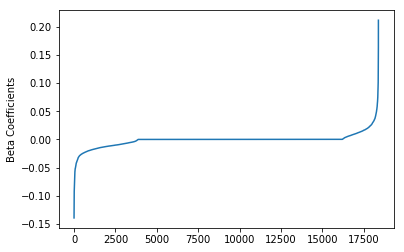

In [100]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel_under_sample.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

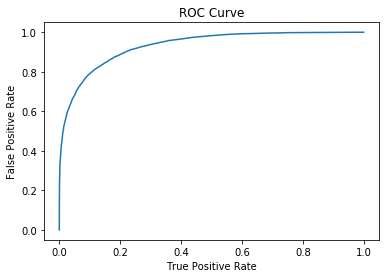

Training set areaUnderROC: 0.9316677575247896


In [101]:
trainingSummary = lrModel_under_sample.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

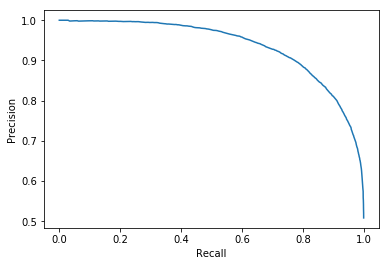

In [102]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### GBTClassifier

In [103]:
gbt_under_sample = GBTClassifier(featuresCol = 'scaledFeatures', labelCol = 'label', maxIter=10)
gbtModel_under_sample = gbt.fit(train)

In [104]:
predictions = gbtModel_under_sample.transform(test)

In [105]:
predictions.select('scaledFeatures', 'label', 'prediction', 'probability').show(10)

+--------------------+-----+----------+--------------------+
|      scaledFeatures|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|[-1.6695122865070...|    1|       1.0|[0.27483377949617...|
|[-1.5980467181264...|    1|       1.0|[0.09946067740210...|
|[-1.4842849562365...|    1|       1.0|[0.35810523633316...|
|[-1.4603051143278...|    1|       1.0|[0.20543451880021...|
|[-1.1675074649620...|    1|       1.0|[0.14404093365855...|
|[-1.1128643826240...|    1|       1.0|[0.06894145437892...|
|[-1.0080118189414...|    1|       1.0|[0.16697254654971...|
|[-0.9128003875949...|    1|       1.0|[0.07934639134036...|
|[-0.7766846374758...|    1|       0.0|[0.61840356417188...|
|[-0.5087367517293...|    1|       1.0|[0.35552732564566...|
+--------------------+-----+----------+--------------------+
only showing top 10 rows



#### GBTClassifier metrics with Undersampling

In [106]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8810291644484833


### Random Forest with hyper parameters

In [111]:
rf_opt = RandomForestClassifier(featuresCol = 'scaledFeatures', labelCol = 'label', numTrees=100, maxBins=50, maxDepth=10)

In [112]:
rf_opt_model = rf_opt.fit(train)

In [113]:
predictions = rf_opt_model.transform(test)

In [114]:
predictions.select('scaledFeatures', 'label', 'prediction', 'probability').show(10)

+--------------------+-----+----------+--------------------+
|      scaledFeatures|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|[-1.6695122865070...|    1|       1.0|[0.37808464188000...|
|[-1.5980467181264...|    1|       1.0|[0.12851823742578...|
|[-1.4842849562365...|    1|       0.0|[0.54818614130016...|
|[-1.4603051143278...|    1|       1.0|[0.36060998059234...|
|[-1.1675074649620...|    1|       1.0|[0.18404431512967...|
|[-1.1128643826240...|    1|       1.0|[0.30867778073763...|
|[-1.0080118189414...|    1|       1.0|[0.39834716133536...|
|[-0.9128003875949...|    1|       1.0|[0.15763477774051...|
|[-0.7766846374758...|    1|       0.0|[0.58801874059680...|
|[-0.5087367517293...|    1|       0.0|[0.51124800164278...|
+--------------------+-----+----------+--------------------+
only showing top 10 rows



#### Random Forest metrics using underssampling

In [116]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8437421639889804
